# Project 3: By Tyler Graham

## Part 1

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from decision_boundaries import linear_decision_boundary_classifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

### Question 1: Load the mushrooms.csv file Download mushrooms.csv file as a DataFrame.

In [33]:
mushroom = pd.read_csv("mushroom.csv")

### Question 2: Using the output of the initial head(), info(), and describe() methods to get a sense of what variables are in the data. What are the variable types? How many values does each variable have?

In [34]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [35]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [36]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


There is 22 variables with 8124 entries for each of these variables. 

### Question 3: Which column indicates whether the mushrooms are poison or editable? This will be the output variable that we are predicting.

The first column labeled as "class" indicates whether the mushroom is "p" or posionous or "e" or editable. 

### Question 4: Which columns can be used as the input variables?

Input variables for mushrooms would be odor and color.

### Question 5: Convert all of the variables to categorical types.

In [37]:
variables = ["class", "cap-shape", "cap-surface", "cap-color",	"bruises",	"odor",	"gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",	"veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
mushroom = mushroom.astype('category')
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

## Part 2

### Question 1: Create the label vector using the LabelEncoder class from scikit-learn to do this. 

In [38]:
label_encoder = LabelEncoder()

mushroom_labeled = label_encoder.fit_transform(mushroom["class"])

In [39]:
print(mushroom_labeled[:10])

[1 0 0 1 0 0 0 0 1 0]


## Part 3

### Question 1: To convert the categorical variables: use Panda's get_dummies() function to create a new DataFrame of dummy columns for each categorical column, append the DataFrames to a list, concatenate all of the resulting DataFrames horizontally into a single DataFrame using the Pandas concat()function. Review the resulting DataFrame using the head() and info() methods.

In [40]:
collist = mushroom.columns.tolist()
mushroom2 = mushroom[collist[1:]]
mushroom_dummies = pd.get_dummies(mushroom2)
mushroom_dummies.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [41]:
mushroom_list = []
mushroom_list.append(mushroom_dummies)
print(mushroom_list)
mushroom_pd = pd.concat(mushroom_list, axis=1)
mushroom_pd.head()
mushroom_pd.info()

[      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0           False        False        False        False        False   
1           False        False        False        False        False   
2            True        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
8119        False        False        False         True        False   
8120        False        False        False        False        False   
8121        False        False         True        False        False   
8122        False        False        False         True        False   
8123        False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            True          False         

### Part 4: Use scikit-learn's train_test_split() function to divide the feature matrix and label vector into training (75%) and testing (25%) sets. The function will partition the rows of the matrix and vector consistently so that they continue to match up. It is important to pass the labels to the stratify parameter. The function will use the labels to ensure that the samples are partitioned so that the ratios of edible and poisonous mushrooms in the training and testing sets are match the ratio from the original data set.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(mushroom_pd, mushroom_labeled, test_size=0.25)

## Part 5

### Question 1: Train a Decision Tree model using the DecisionTreeClassifier class using the training set.

In [43]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

### Question 3: Predict the labels for the testing set.

In [44]:
prediction = clf.predict(X_test)

### Question 4: Calculate the accuracy score and a confusion matrix from the predicted and true labels. This data set is relatively easy, so you should achieve 100% accuracy and your confusion matrix should only have non-zero entries on the diagonal.

In [45]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

1.0


In [46]:
confusion = confusion_matrix(y_test, prediction)
print(confusion)

[[1036    0]
 [   0  995]]


### Question 5: Plot the Decision Tree using the following code snippet

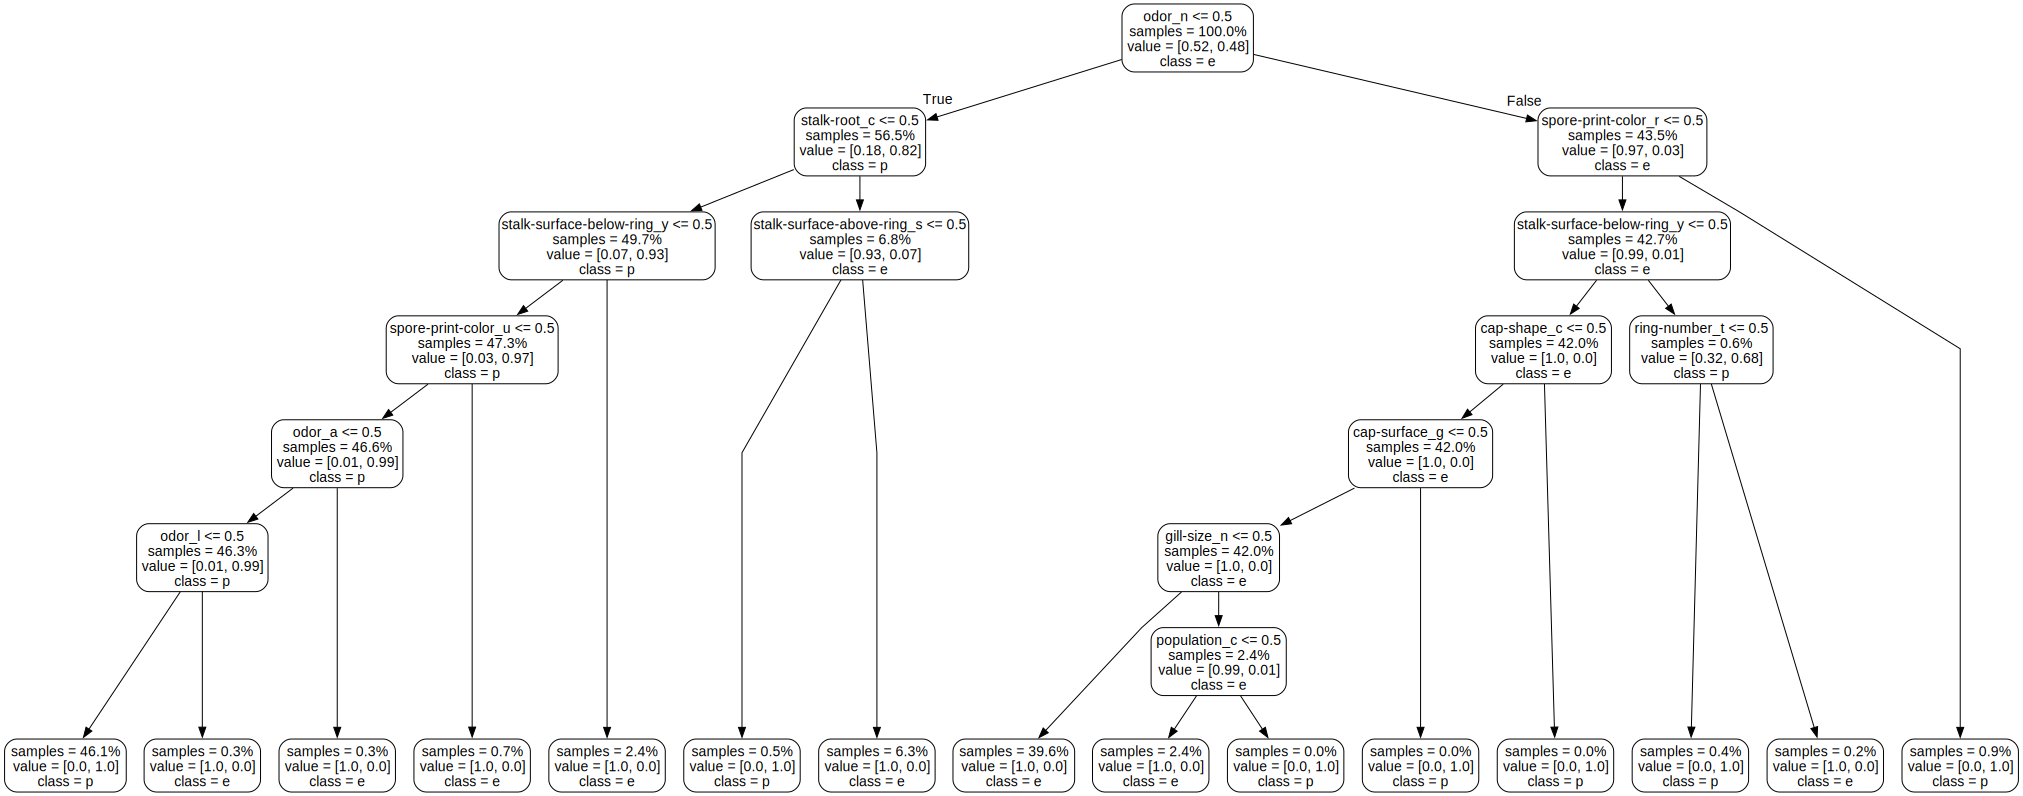

In [47]:
dot_data = export_graphviz(clf,
                           feature_names=mushroom_pd.columns,
                           proportion=True,
                           precision=2,
                           rounded=True,
                           class_names=label_encoder.classes_,
                           impurity=False,
                           leaves_parallel=True)

graph = graphviz.Source(dot_data)
graph

### Question 6:  Try values between 0.001 and 0.1. Evaluate the accuracy of the predictions from and plot the resulting trees. 

In [48]:
clf = DecisionTreeClassifier(ccp_alpha = .001)
clf = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9985228951255539


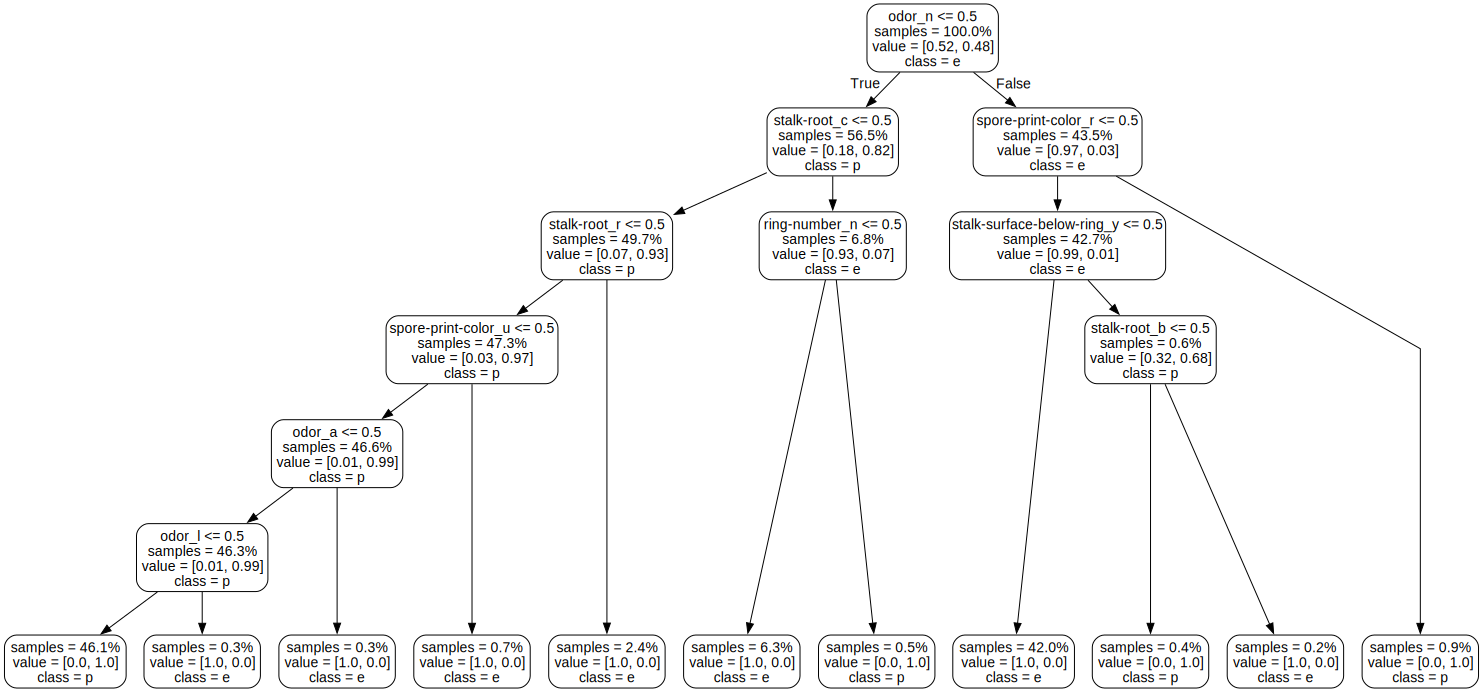

In [49]:
dot_data = export_graphviz(clf,
                           feature_names=mushroom_pd.columns,
                           proportion=True,
                           precision=2,
                           rounded=True,
                           class_names=label_encoder.classes_,
                           impurity=False,
                           leaves_parallel=True)

graph = graphviz.Source(dot_data)
graph

In [50]:
clf = DecisionTreeClassifier(ccp_alpha = .05)
clf = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9448547513540128


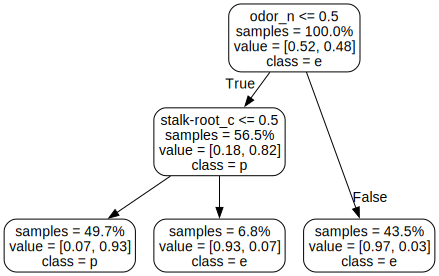

In [51]:
dot_data = export_graphviz(clf,
                           feature_names=mushroom_pd.columns,
                           proportion=True,
                           precision=2,
                           rounded=True,
                           class_names=label_encoder.classes_,
                           impurity=False,
                           leaves_parallel=True)

graph = graphviz.Source(dot_data)
graph

## Part 6

### Question 1: Train a Logistic Regression model using the SGDClassifier class with the parameter loss="log".

In [52]:
logistic_model = SGDClassifier(loss="log_loss")
logistic_model.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

### Question 2: Evaluate the model using accuracy and confusion matrix.

In [53]:
prediction = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [54]:
confusion = confusion_matrix(y_test, prediction)
print(confusion)

[[1036    0]
 [   0  995]]


### Question 3: Use the predict_proba() method to get the estimated probabilities. This will be a samples x 2 array – only use the first column. Plot a histogram of the probabilities using Seaborn's histplot() function. Observe that the probabilities are very bimodal in this case.

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


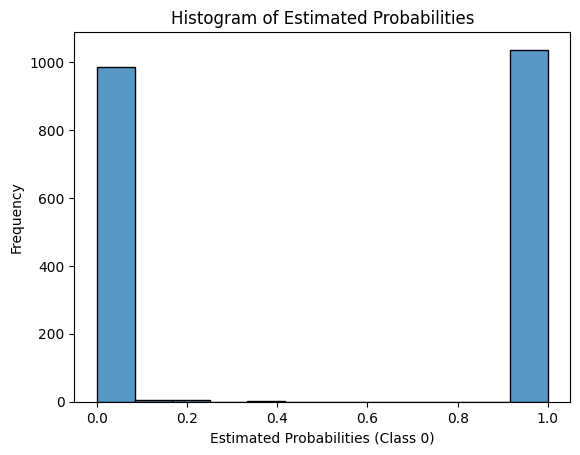

In [69]:
predicted_probabilities = logistic_model.predict_proba(X_test)

sns.histplot(predicted_probabilities[:, 0])
plt.xlabel('Estimated Probabilities (Class 0)')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Probabilities')
plt.show()

### Question 6: Inspect the model weights. The SGDClassifier has a 1 x features array coef_ that contains the learned weights. Plot a histogram of the weights using the first (and only row). The weights with the largest magnitudes indicate features with the most predictive power.

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


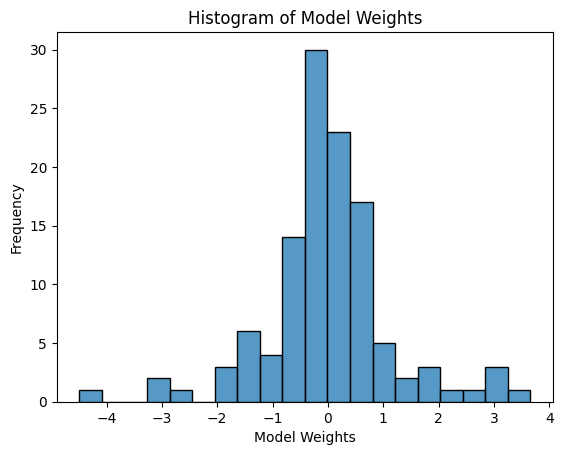

In [74]:
weights = logistic_model.coef_

sns.histplot(weights[0])
plt.xlabel('Model Weights')
plt.ylabel('Frequency')
plt.title('Histogram of Model Weights')
plt.show()